In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from zipfile import ZipFile

In [ ]:
# mount from my drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
from zipfile import ZipFile
# Read the train.json.zip file from the drive
with ZipFile('/content/drive/My Drive/train.json.zip', 'r') as zip_ref:
    with zip_ref.open('train.json') as f:
        train_df = pd.read_json(f)

# Read the test.json file from the drive
with open('/content/drive/My Drive/test.json', 'r') as f:
    test_df = pd.read_json(f)


In [ ]:
# Check for missing values
print(train_df.isnull().sum())
print(test_df.isnull().sum())

document               0
full_text              0
tokens                 0
trailing_whitespace    0
labels                 0
dtype: int64
document               0
full_text              0
tokens                 0
trailing_whitespace    0
dtype: int64


In [ ]:
# Explore the datasets
print(train_df.info())
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6807 entries, 0 to 6806
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   document             6807 non-null   int64 
 1   full_text            6807 non-null   object
 2   tokens               6807 non-null   object
 3   trailing_whitespace  6807 non-null   object
 4   labels               6807 non-null   object
dtypes: int64(1), object(4)
memory usage: 266.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   document             10 non-null     int64 
 1   full_text            10 non-null     object
 2   tokens               10 non-null     object
 3   trailing_whitespace  10 non-null     object
dtypes: int64(1), object(3)
memory usage: 448.0+ bytes
None


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_train = tfidf_vectorizer.fit_transform(train_df['full_text'])
X_test = tfidf_vectorizer.transform(test_df['full_text'])
y_train = train_df['labels']

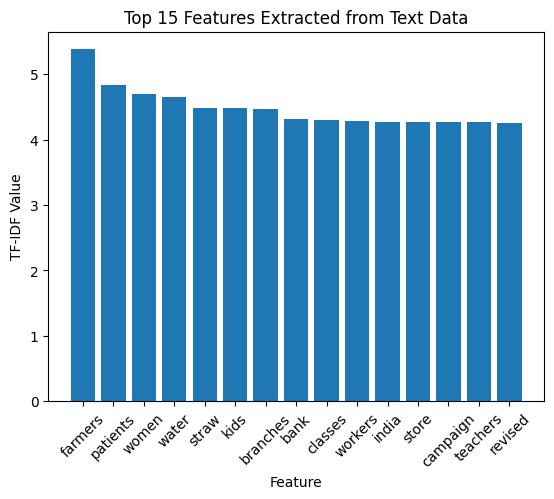

In [ ]:
# prompt: show the features extracted in visual form
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

# Get feature names
feature_names = tfidf_vectorizer.get_feature_names_out()

# Sort features by their TF-IDF values
sorted_features = sorted(zip(tfidf_vectorizer.idf_, feature_names), reverse=True)

# Extract the top 15 features
top_features = [feature[1] for feature in sorted_features[:15]]

# Create a bar chart
plt.bar(top_features, [feature[0] for feature in sorted_features[:15]])
plt.xlabel("Feature")
plt.ylabel("TF-IDF Value")
plt.title("Top 15 Features Extracted from Text Data")
plt.xticks(rotation=45)
plt.show()


In [ ]:
y_train_np = np.array(y_train)

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
# Flatten the list of lists
y_train_flattened = np.ravel(y_train_np)

# Convert the flattened list into a one-dimensional array of strings
y_train_flattened = np.array([str(item) for item in y_train_flattened])

# Encode the strings using the LabelEncoder
y_train_encoded = label_encoder.fit_transform(y_train_flattened)

In [ ]:
# Split data for training and validation
X_train, X_valid, y_train_encoded, y_valid = train_test_split(X_train, y_train_encoded, test_size=0.2, random_state=42)


In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import VotingClassifier

In [ ]:
svm_clf = SVC()
svm_clf.fit(X_train, y_train_encoded)
svm_preds = svm_clf.predict(X_valid)
svm_accuracy = accuracy_score(y_valid, svm_preds)
svm_report = classification_report(y_valid, svm_preds)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
# prompt: visualize the pii after svm classification

import matplotlib.pyplot as plt

# Create a bar chart of the predicted PII types
plt.bar(svm_preds, y_valid)
plt.xlabel('Predicted PII Type')
plt.ylabel('Actual PII Type')
plt.title('SVM Classification of PII Types')
plt.show()


In [ ]:
# prompt: print("Support Vector Machine (SVM) Classifier:")
# print(f"Accuracy: {svm_accuracy}")
# modify in a way to calculate in percentage

svm_accuracy_percentage = svm_accuracy * 100
print("Support Vector Machine (SVM) Classifier:")
print(f"Accuracy: {svm_accuracy_percentage:.2f}%")


In [ ]:
nb_clf = MultinomialNB()
nb_clf.fit(X_train, y_train_encoded)
nb_preds = nb_clf.predict(X_valid)
nb_accuracy = accuracy_score(y_valid, nb_preds)
nb_report = classification_report(y_valid, nb_preds)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# prompt: visualize the pii after navie bayes classification

# Create a bar chart of the predicted PII types
plt.bar(nb_preds, y_valid)
plt.xlabel('Predicted PII Type')
plt.ylabel('Actual PII Type')
plt.title('Naive Bayes Classification of PII Types')
plt.show()


In [ ]:
# prompt: print the accuracy

nb_accuracy_percentage = nb_accuracy * 100
print("Naive Bayes (NB) Classifier:")
print(f"Accuracy: {nb_accuracy_percentage:.2f}%")


In [ ]:
lr_clf = LogisticRegression(max_iter=1000)
lr_clf.fit(X_train, y_train_encoded)
lr_preds = lr_clf.predict(X_valid)
lr_accuracy = accuracy_score(y_valid, lr_preds)
lr_report = classification_report(y_valid, lr_preds)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
# prompt: visualize the pii after logistic regression

# Create a bar chart of the predicted PII types
plt.bar(lr_preds, y_valid)
plt.xlabel('Predicted PII Type')
plt.ylabel('Actual PII Type')
plt.title('Logistic Regression Classification of PII Types')
plt.show()

lr_accuracy_percentage = lr_accuracy * 100
print("Logistic Regression (LR) Classifier:")
print(f"Accuracy: {lr_accuracy_percentage:.2f}%")


In [ ]:
mlp_clf = MLPClassifier()
mlp_clf.fit(X_train, y_train_encoded)
mlp_preds = mlp_clf.predict(X_valid)
mlp_accuracy = accuracy_score(y_valid, mlp_preds)
mlp_report = classification_report(y_valid, mlp_preds)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being se

In [ ]:
# prompt:  visualize the pii after (MLP) Classifier

# Create a bar chart of the predicted PII types
plt.bar(mlp_preds, y_valid)
plt.xlabel('Predicted PII Type')
plt.ylabel('Actual PII Type')
plt.title('Multi-layer Perceptron (MLP) Classification of PII Types')
plt.show()

mlp_accuracy_percentage = mlp_accuracy * 100
print("Multi-layer Perceptron (MLP) Classifier:")
print(f"Accuracy: {mlp_accuracy_percentage:.2f}%")


In [ ]:
# Create a Voting Classifier with the base classifiers
voting_clf = VotingClassifier(estimators=[
    ('svm', svm_clf),
    ('naive_bayes', nb_clf),
    ('logistic_regression', lr_clf),
    ('mlp', mlp_clf)
], voting='hard')  # 'hard' voting means majority voting


In [ ]:
# Train the Voting Classifier
voting_clf.fit(X_train, y_train_encoded)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


VotingClassifier(estimators=[('svm', SVC()), ('naive_bayes', MultinomialNB()),
                             ('logistic_regression',
                              LogisticRegression(max_iter=1000)),
                             ('mlp', MLPClassifier())])

In [ ]:
# Make predictions using the Voting Classifier
voting_preds = voting_clf.predict(X_valid)
voting_accuracy = accuracy_score(y_valid, voting_preds)
voting_report = classification_report(y_valid, voting_preds)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

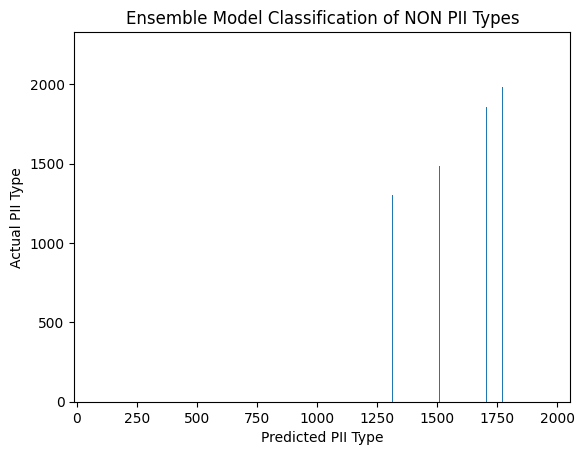

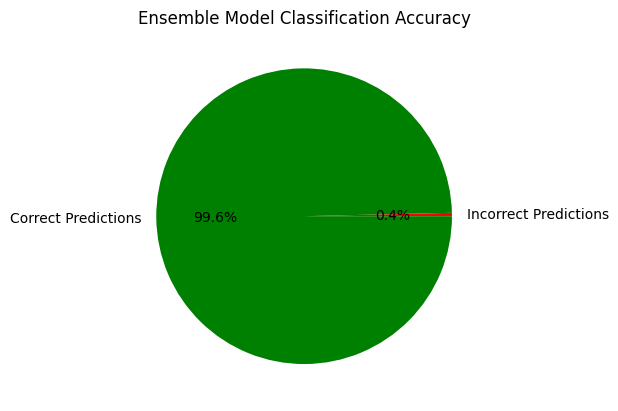

In [ ]:
# prompt: visualize the pii data after the ensemble model

# Create a bar chart of the predicted PII types
plt.bar(voting_preds, y_valid)
plt.xlabel('Predicted PII Type')
plt.ylabel('Actual PII Type')
plt.title('Ensemble Model Classification of NON PII Types')
plt.show()
print('\n')
# Create a pie chart of the predicted PII types
labels = ['Incorrect Predictions', 'Correct Predictions']
sizes = [sum(voting_preds == y_valid), sum(voting_preds != y_valid)]
colors = ['red', 'green']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Ensemble Model Classification Accuracy')
plt.show()
